In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Sollen-R/DS300-Final/main/Datasets/initial_dataset.csv')

In [3]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
df.drop('url', axis='columns', inplace=True)

In [5]:
useless_cols = []

for col in df:
    if len(df[col].value_counts()) == 1:
        useless_cols.append(col)
        
print(useless_cols)

['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection', 'ratio_intErrors', 'submit_email', 'sfh']


In [6]:
df.drop(useless_cols, axis='columns', inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
ss = StandardScaler()
le = LabelEncoder()

df['status'] = le.fit_transform(df['status'])
df_scaled = pd.DataFrame(ss.fit_transform(df), columns=df.columns)

x = df_scaled.drop('status', axis='columns')
y = df['status']

In [9]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)

pca.fit(x)

PCA(whiten=True)

In [20]:
pcadf = pd.DataFrame(pca.explained_variance_ratio_, columns=['Importance'], index=['PCA'+str(x) for x in range(1, len(pca.explained_variance_ratio_)+1)])

In [21]:
pcadf

,Importance
PCA1,0.101401
PCA2,0.053676
PCA3,0.047410
PCA4,0.045312
PCA5,0.036051
...,...
PCA77,0.000545
PCA78,0.000433
PCA79,0.000157
PCA80,0.000124


C:\Users\viper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Component', ylabel='Importance'>

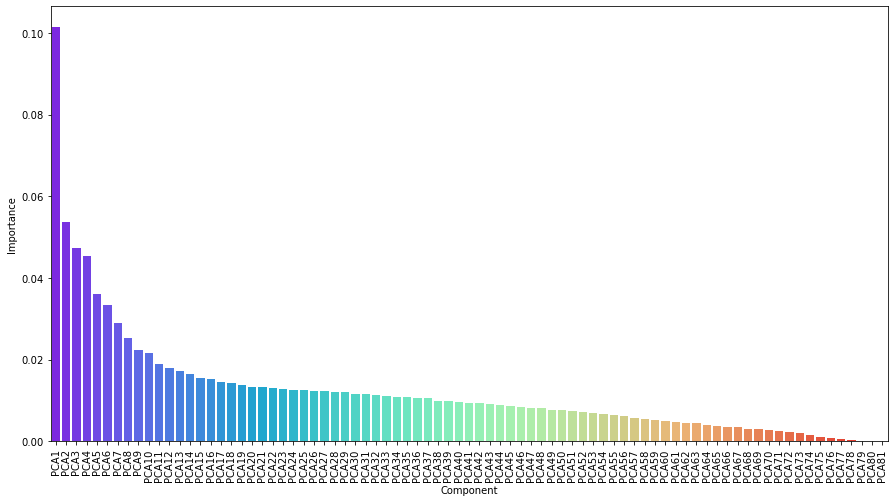

In [35]:
plt.figure(figsize=(15, 8))
plt.xlabel('Component')
plt.xticks(rotation=90)
sns.barplot(pcadf.index, pcadf['Importance'], palette='rainbow')

In [45]:
#30 components will explain about 70% of the variance, so let's try to make a new model with that

In [46]:
pca = PCA(30, whiten=True)

x_pca = pca.fit_transform(x)

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=8675309)

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_pred = lr.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1028   81]
 [  90 1087]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1109
           1       0.93      0.92      0.93      1177

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286

